In [1]:
#Se importan las librerías.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Se leen los datos.
df = pd.read_csv("meteo-nogal-09.csv",engine="python")
sns.set(rc={'figure.figsize':(12,8.27)})

In [3]:
#Se deshacen los datos inútiles.
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

In [4]:
#Se droppea la del renglón 0.
df = df.drop(df.index[0])

In [5]:
#Se convierte la columna de DATE a variable temporal.
df['Fecha'] = pd.to_datetime(df.apply(lambda x: x['DATE'], 1), dayfirst=True)

In [6]:
#Se consigue la columna de años.
df['Año'] = df['Fecha'].dt.year

In [7]:
#Se seleccionan los datos de 2009
df0 = df[df["Año"]==2009]

In [8]:
#Se comprueban que estén bien los datos.
df0.head()

,DATE,TIME,u_Avg,v_Avg,w_Avg,t_Avg,kh20_Avg,net_rad_Avg,shf1_Avg,shf2_Avg,vv_Avg,airT_Avg,rh_Avg,e_sat_Avg,e_Avg,h2o_hmp_Avg,Fecha,Año
1,01-01-09,00:10,1.215,0.506,-0.044,10.95,1.159,-176.5,23.58,-26.72,1.327,9.4,0.899,1.178,1.059,8.12,2009-01-01,2009.0
2,01-01-09,00:20,0.892,0.588,-0.072,10.81,1.159,-176.6,23.73,-26.76,1.079,9.24,0.896,1.166,1.045,8.02,2009-01-01,2009.0
3,01-01-09,00:30,1.227,0.6850001,-0.06900001,10.34,1.224,-175.5,23.61,-26.46,1.421,9.059999,0.896,1.152,1.032,7.926001,2009-01-01,2009.0
4,01-01-09,00:40,1.135,0.7410001,-0.093,9.8,1.258,-182.7,23.41,-26.46,1.384,9.059999,0.874,1.152,1.008,7.737,2009-01-01,2009.0
5,01-01-09,00:50,0.7550001,1.064,-0.149,8.87,1.332,-184.8,23.22,-26.39,1.359,8.63,0.859,1.119,0.961,7.39,2009-01-01,2009.0


In [9]:
df0.tail()

,DATE,TIME,u_Avg,v_Avg,w_Avg,t_Avg,kh20_Avg,net_rad_Avg,shf1_Avg,shf2_Avg,vv_Avg,airT_Avg,rh_Avg,e_sat_Avg,e_Avg,h2o_hmp_Avg,Fecha,Año
52333,31/12/2009,23:10:00,0.736,-0.135,12.49,1050,-76.38,NAN,NAN,2.595,12.82,0.482,1.480,0.713,5.405,NaN,2009-12-31,2009.0
52334,31/12/2009,23:20:00,0.711,-0.106,12.24,1047,-75.03,NAN,NAN,2.517,12.62,0.489,1.460,0.714,5.416,NaN,2009-12-31,2009.0
52335,31/12/2009,23:30:00,0.746,-0.116,11.9,1043,-74.88,NAN,NAN,2.38,12.3,0.5,1.430,0.715,5.428,NaN,2009-12-31,2009.0
52336,31/12/2009,23:40:00,0.641,-0.084,11.53,1054,-71.33,NAN,NAN,2.182,11.88,0.509,1.391,0.708,5.383,NaN,2009-12-31,2009.0
52337,31/12/2009,23:50:00,0.538,-0.075,11.31,1064,-69.4,NAN,NAN,2.102,11.54,0.516,1.360,0.701,5.338,NaN,2009-12-31,2009.0


In [10]:
#Se utiliza un comando que te devuelve un array con los nombres de las columnas.
Columnas = df0.columns

In [11]:
#Se utiliza dicho comando para hacer los datos numéricos.
df0[Columnas] = df0[Columnas].apply(pd.to_numeric,errors='coerce')

C:\Users\NTIC-USER\Anaconda3\lib\site-packages\pandas\core\frame.py:3140: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


In [12]:
#Se droppean los datos innecesarios.
df1 = df0.drop(['DATE','TIME','Fecha','Año'] ,axis=1)

In [13]:

#Se utiliza el comando corr para obtener las correlaciones.
df2 = df1.corr(method='pearson')

In [14]:
#Se muestra el DataFrame con las correlaciones.
df2

,u_Avg,v_Avg,w_Avg,t_Avg,kh20_Avg,net_rad_Avg,shf1_Avg,shf2_Avg,vv_Avg,airT_Avg,rh_Avg,e_sat_Avg,e_Avg,h2o_hmp_Avg
u_Avg,1.000000,0.241494,0.015906,0.044331,-0.049445,-0.094394,0.089411,0.003542,-0.163176,-0.363548,0.331126,-0.370644,0.103343,0.173845
v_Avg,0.241494,1.000000,0.009572,0.011734,0.155188,-0.117176,0.029321,-0.053846,-0.088159,-0.344386,0.098515,-0.347170,-0.109168,-0.189840
w_Avg,0.015906,0.009572,1.000000,0.601335,0.128426,0.133556,-0.079466,-0.010182,0.912885,-0.338470,0.737544,-0.192107,0.646316,0.125133
t_Avg,0.044331,0.011734,0.601335,1.000000,-0.009929,0.266318,-0.094414,-0.006335,0.529160,-0.231403,0.367252,-0.139445,0.306703,0.576896
kh20_Avg,-0.049445,0.155188,0.128426,-0.009929,1.000000,-0.157759,-0.005268,-0.061590,0.152027,-0.122687,0.024498,-0.123180,-0.126972,-0.326760
net_rad_Avg,-0.094394,-0.117176,0.133556,0.266318,-0.157759,1.000000,-0.206065,-0.027206,0.162470,0.334375,-0.266374,0.385945,0.074294,0.056376
shf1_Avg,0.089411,0.029321,-0.079466,-0.094414,-0.005268,-0.206065,1.000000,0.059003,-0.089608,-0.121637,0.084782,-0.138901,-0.016448,0.014207
shf2_Avg,0.003542,-0.053846,-0.010182,-0.006335,-0.061590,-0.027206,0.059003,1.000000,-0.017229,0.078023,0.017651,0.081718,0.051809,0.151206
vv_Avg,-0.163176,-0.088159,0.912885,0.529160,0.152027,0.162470,-0.089608,-0.017229,1.000000,-0.223757,0.582047,-0.091182,0.521232,-0.193064
airT_Avg,-0.363548,-0.344386,-0.338470,-0.231403,-0.122687,0.334375,-0.121637,0.078023,-0.223757,1.000000,-0.484177,0.964464,0.088203,0.464621


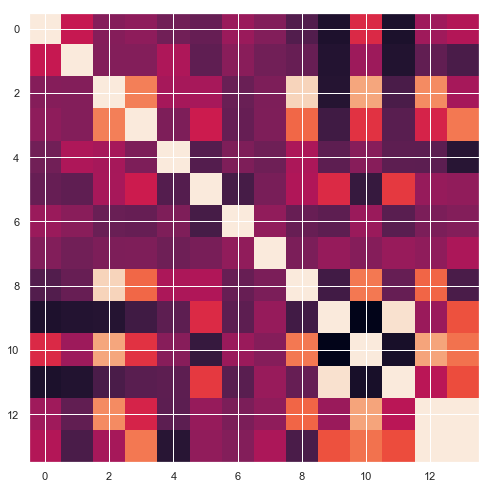

In [15]:
plt.imshow(df2)

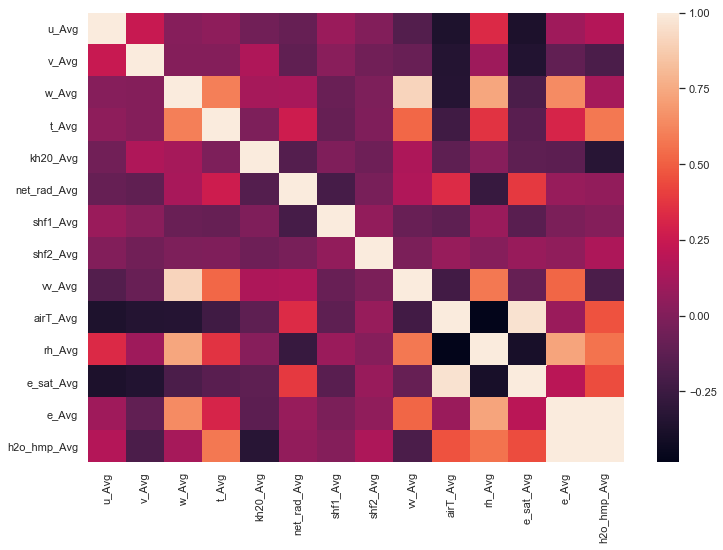

In [16]:
#Se grafica con un comando directo de seaborn.
sns.heatmap(df2)
plt.savefig('HeatMap', plt = 2000)
plt.show()

In [ ]:
#Se proceden a hacer las gráficas la correlación es mayor o igual a 0.6, mediante una gráfica de dispersión de puntos.

Text(0.5, 1.0, 'w_Avg vs t_Avg (corr=0.6013)')

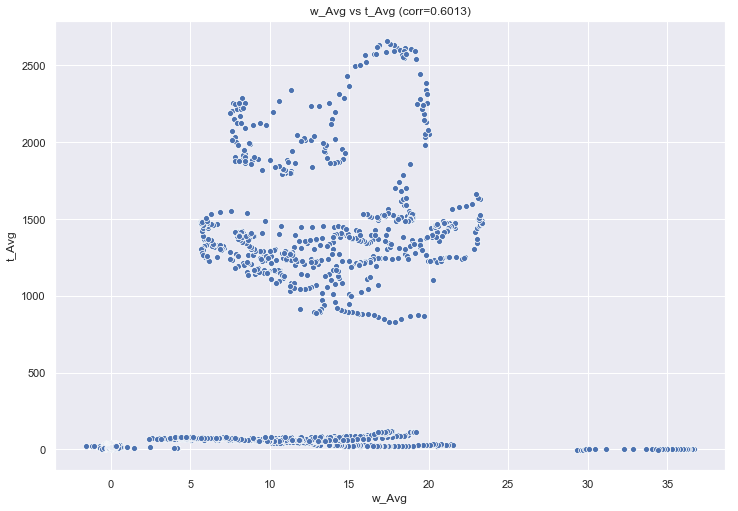

In [18]:
sns.scatterplot(x=df1["w_Avg"],y=df1["t_Avg"])
plt.title("w_Avg vs t_Avg (corr=0.6013)")

Text(0.5, 1.0, 'w_Avg vs vv_Avg (corr=0.9128)')

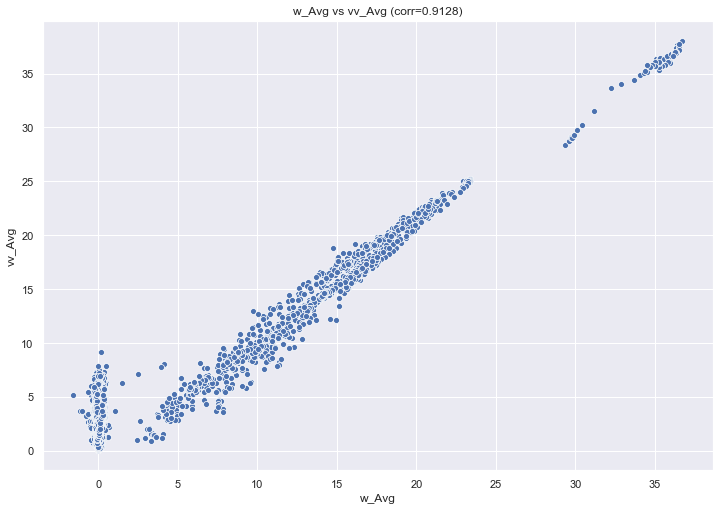

In [19]:
sns.scatterplot(x=df1["w_Avg"],y=df1["vv_Avg"])
plt.title("w_Avg vs vv_Avg (corr=0.9128)")

Text(0.5, 1.0, 'w_Avg vs rh_Avg (corr=0.7375)')

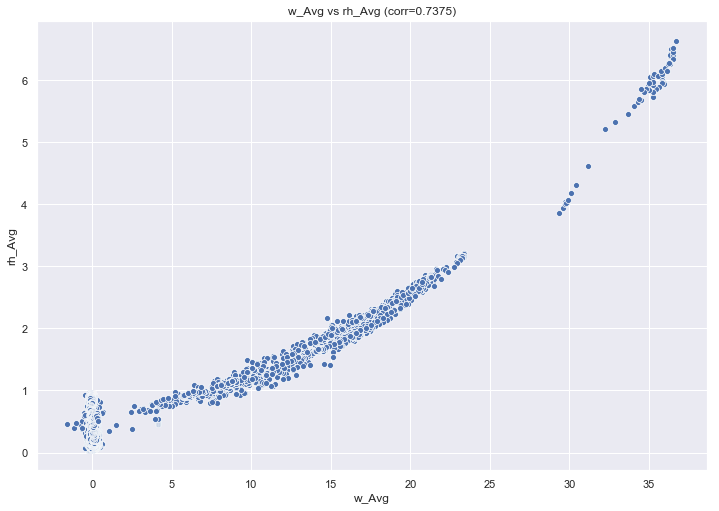

In [20]:
sns.scatterplot(x=df1["w_Avg"],y=df1["rh_Avg"])
plt.title("w_Avg vs rh_Avg (corr=0.7375)")

Text(0.5, 1.0, 'w_Avg vs e_Avg (corr=0.6463)')

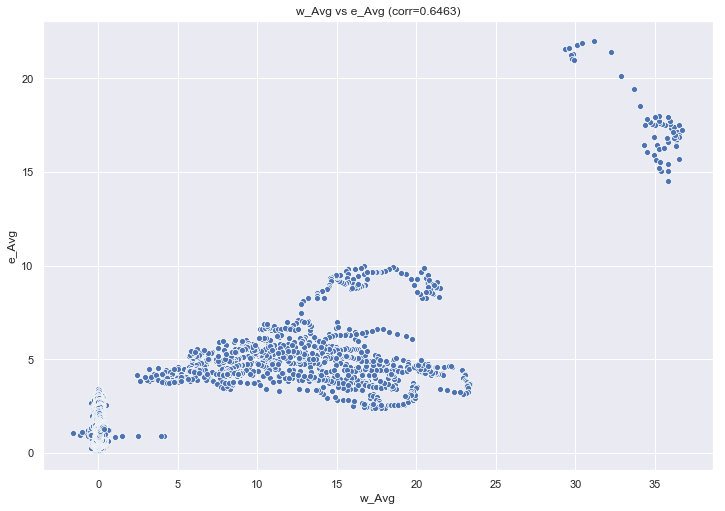

In [21]:
sns.scatterplot(x=df1["w_Avg"],y=df1["e_Avg"])
plt.title("w_Avg vs e_Avg (corr=0.6463)")

Text(0.5, 1.0, 't_Avg vs w_Avg (corr=0.6013)')

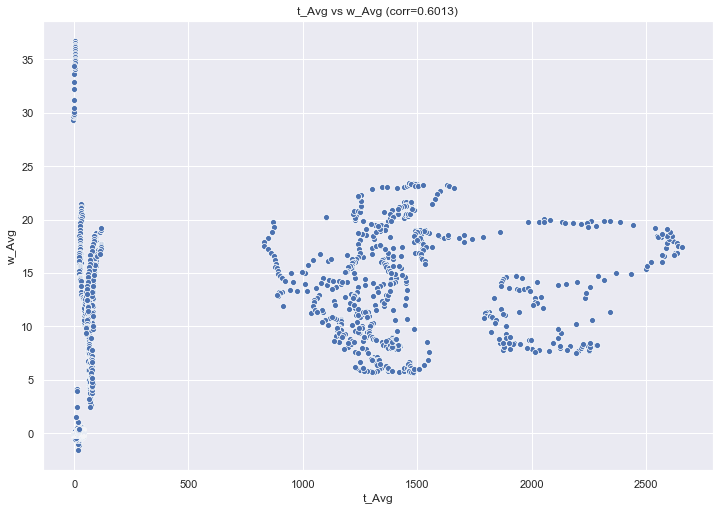

In [22]:

sns.scatterplot(x=df1["t_Avg"],y=df1["w_Avg"])
plt.title("t_Avg vs w_Avg (corr=0.6013)")

Text(0.5, 1.0, 'vv_Avg vs w_Avg (corr=0.9128)')

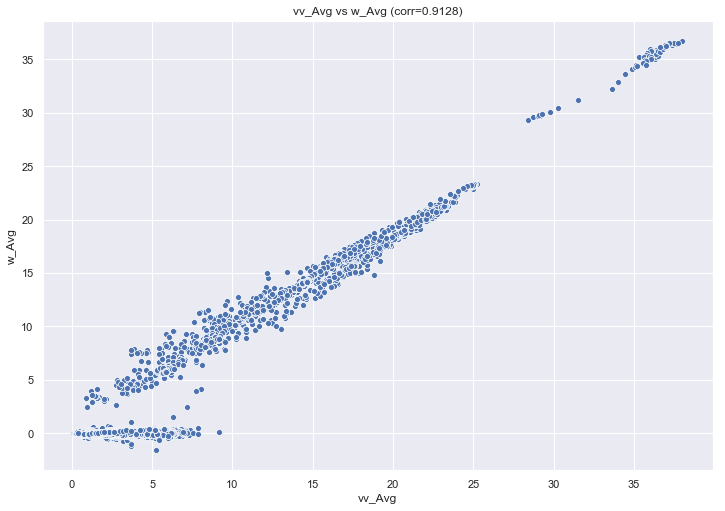

In [23]:
sns.scatterplot(x=df1["vv_Avg"],y=df1["w_Avg"])
plt.title("vv_Avg vs w_Avg (corr=0.9128)")

Text(0.5, 1.0, 'airT_Avg vs e_sat_Avg (corr=0.9644)')

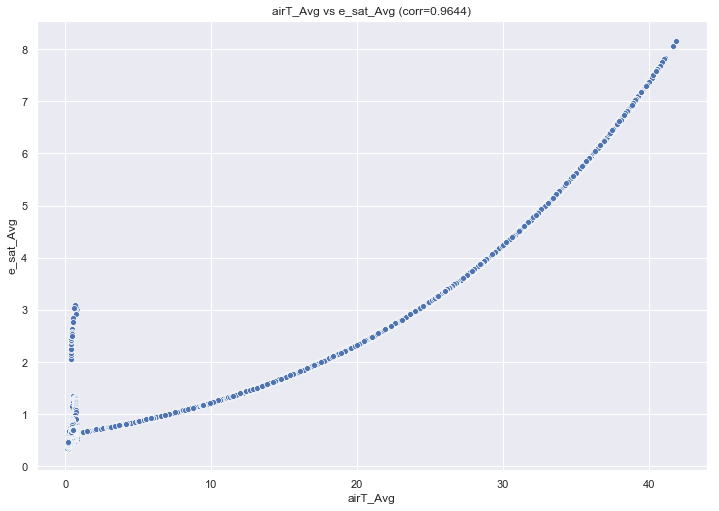

In [24]:

sns.scatterplot(x=df1["airT_Avg"],y=df1["e_sat_Avg"])
plt.title("airT_Avg vs e_sat_Avg (corr=0.9644)")

Text(0.5, 1.0, 'rh_Avg vs w_Avg (corr=0.7375)')

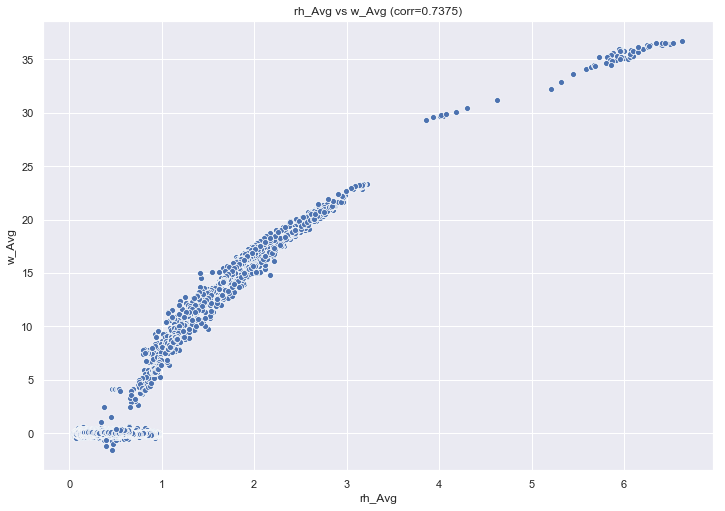

In [25]:
sns.scatterplot(x=df1["rh_Avg"],y=df1["w_Avg"])
plt.title("rh_Avg vs w_Avg (corr=0.7375)")

Text(0.5, 1.0, 'rh_Avg vs e_Avg (corr=0.7286)')

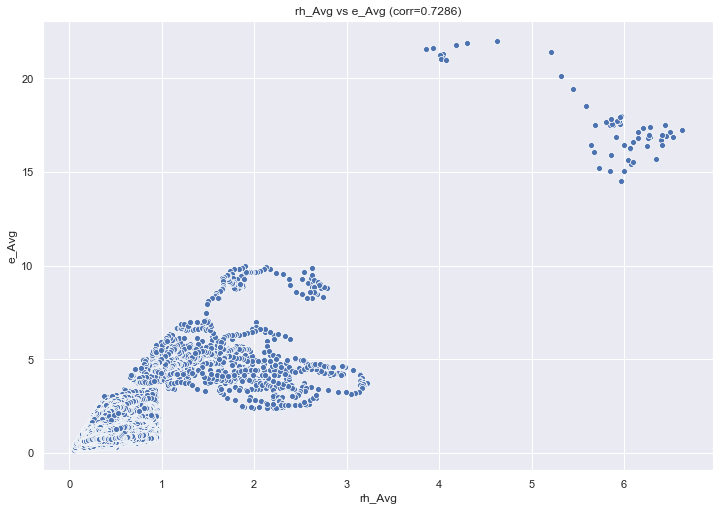

In [26]:
sns.scatterplot(x=df1["rh_Avg"],y=df1["e_Avg"])
plt.title("rh_Avg vs e_Avg (corr=0.7286)")

Text(0.5, 1.0, 'e_sat_Avg vs airT_Avg (corr=0.9644)')

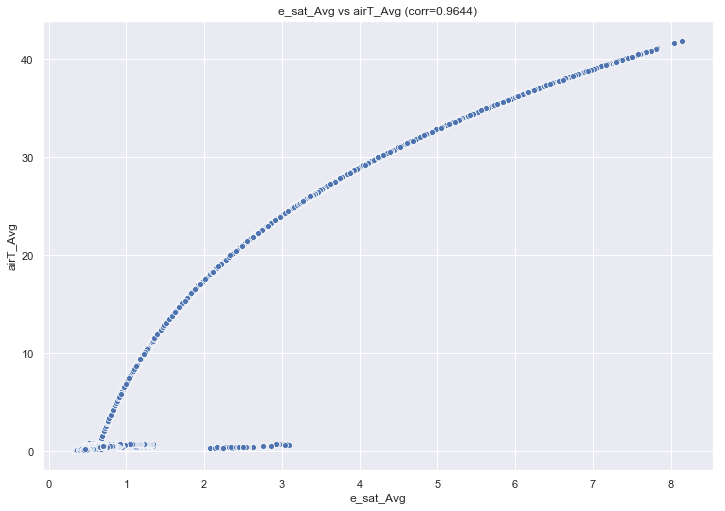

In [27]:
sns.scatterplot(x=df1["e_sat_Avg"],y=df1["airT_Avg"])
plt.title("e_sat_Avg vs airT_Avg (corr=0.9644)")

Text(0.5, 1.0, 'e_Avg vs w_Avg (corr=0.6463)')

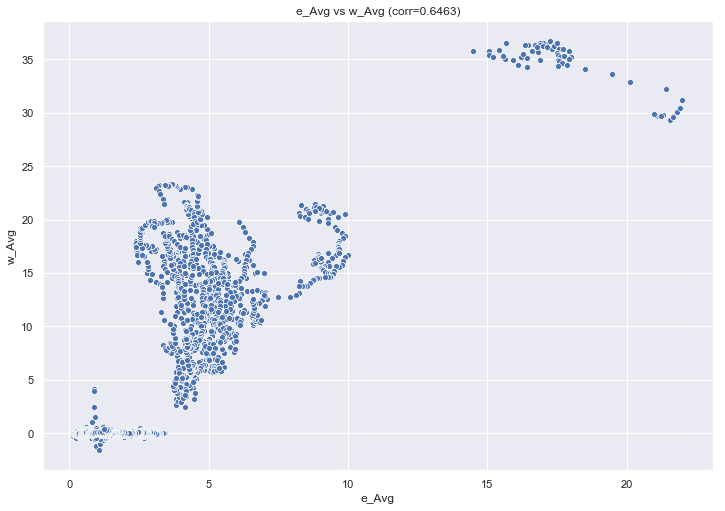

In [28]:
sns.scatterplot(x=df1["e_Avg"],y=df1["w_Avg"])
plt.title("e_Avg vs w_Avg (corr=0.6463)")

Text(0.5, 1.0, 'e_Avg vs rh_Avg (corr=0.7286)')

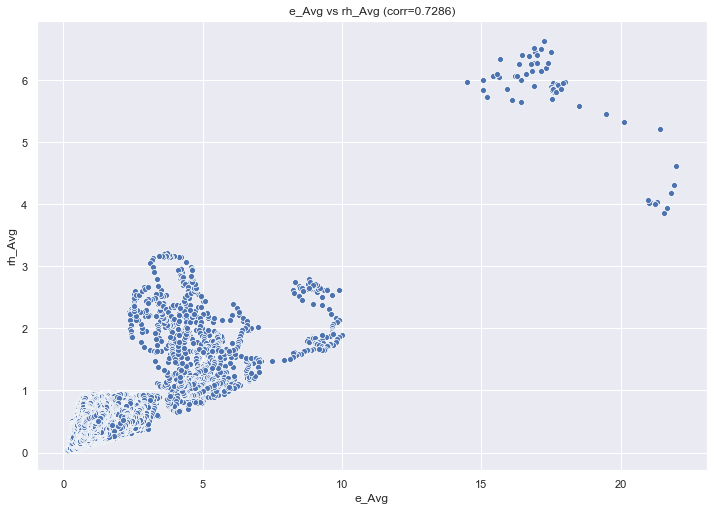

In [29]:
sns.scatterplot(x=df1["e_Avg"],y=df1["rh_Avg"])
plt.title("e_Avg vs rh_Avg (corr=0.7286)")

Text(0.5, 1.0, 'e_Avg vs h2o_hmp_Avg (corr=0.9991)')

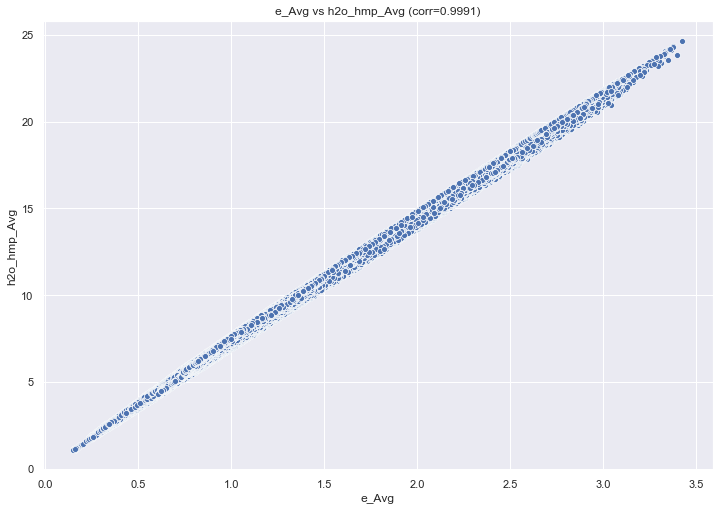

In [30]:
sns.scatterplot(x=df1["e_Avg"],y=df1["h2o_hmp_Avg"])
plt.title("e_Avg vs h2o_hmp_Avg (corr=0.9991)")

Text(0.5, 1.0, 'h2o_hmp_Avg vs e_Avg (corr=0.9991)')

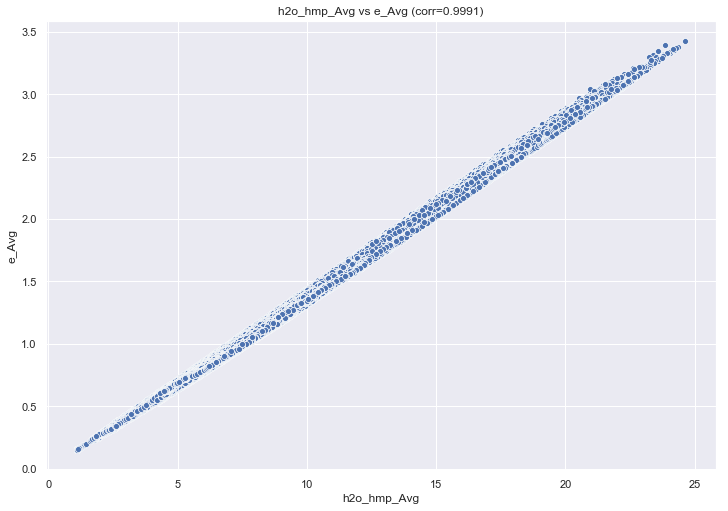

In [31]:
sns.scatterplot(x=df1["h2o_hmp_Avg"],y=df1["e_Avg"])
plt.title("h2o_hmp_Avg vs e_Avg (corr=0.9991)")